In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing dataset
1.Since data is form of excel file we have to use pandas             read_excel to load the data.
2.Check wheather any null values are there or not.if it is present   then full NaN values with mean,median and mode using fillna()     method.
3.Describe data---> which give give statistical analysis.


In [45]:
#it is execel file not csv 
train_data= pd.read_excel("C:/Users/Ankita/Downloads/flight_prediction/Data_Train.xlsx")

In [46]:
#Loading train dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Our target is Price,Price is depends on Date_of_Journey,Source, Dep_time,Arrival_time.
Price is continous in nature we will use linear Regression in this dataset.

In [47]:
train_data.shape

(10683, 11)

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All columns are object type except Price. It is int type.

In [49]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
33h 45m      1
13h 35m      1
33h 20m      1
19h 50m      1
31h 50m      1
Name: Duration, Length: 368, dtype: int64

In [50]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

only 2 missing values are there so we will drop.

In [51]:
train_data.dropna(inplace=True)

In [52]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

From description we can see that Date_of_Journey is a object data type,Therefore we have to convert this datatype into timestamp so as to use this column properly for prediction.

For this we require pandas to _datetime to convert object data type to datetime dtype.

In [53]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey,format='%d/%m/%Y').dt.day

In [54]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [55]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [56]:
#Since we have converted Date_of_Journey column into integers,Now we can drop as it it of no use.

train_data.drop(['Date_of_Journey'],axis=1, inplace = True)

In [57]:
#Similar to Date_of_Journey we can extract values from Dep_Time

#Extracting Hours
train_data['Dep_hour']= pd.to_datetime(train_data['Dep_Time']).dt.hour

#Extracting Minutes
train_data['Dep_min']= pd.to_datetime(train_data['Dep_Time']).dt.minute

#Now we can drop Dep_Time as it is of no use
train_data.drop(['Dep_Time'],axis=1, inplace= True)

In [58]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [59]:
#Similar to Date_of_Journey we can extract values from Arrival_Time

#Extracting Hours
train_data['Arrival_hour']= pd.to_datetime(train_data['Arrival_Time']).dt.hour

#Extracting Minutes
train_data['Arrival_min']= pd.to_datetime(train_data['Arrival_Time']).dt.minute

#Now we can drop Arrival_Time as it is of no use
train_data.drop(['Arrival_Time'],axis=1, inplace= True)

In [60]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [111]:
#Time taken by plane to reach destination is called Duration
#It is the difference between Departure time and Arrival time

#Assigning and converting Duration column into list
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:  #Check if duration only hour or mins
        if 'h' in duration[i]:
            duration[i]=duration[i]+ '0m'  #Adds 0 minute
        else:
            duration[i] = '0h' + duration[i].strip()      #Adds 0 hour

duration_hours =[]
duration_mins =[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep ='m')[0].strip()[-1]))
            

In [112]:
#Adding duration_hours and duration_mins list to train_data dataframe

train_data['duration_hours'] =duration_hours
train_data['duration_mins'] =duration_mins

In [113]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,5


In [114]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [115]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,5


# Handling Categorical Data

1.Nominal data---> data are in any order--->OneHotEncoder is used in this case.

2.Ordinal data---> data are in order---> LabelEncoder is used in this case.

In [116]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

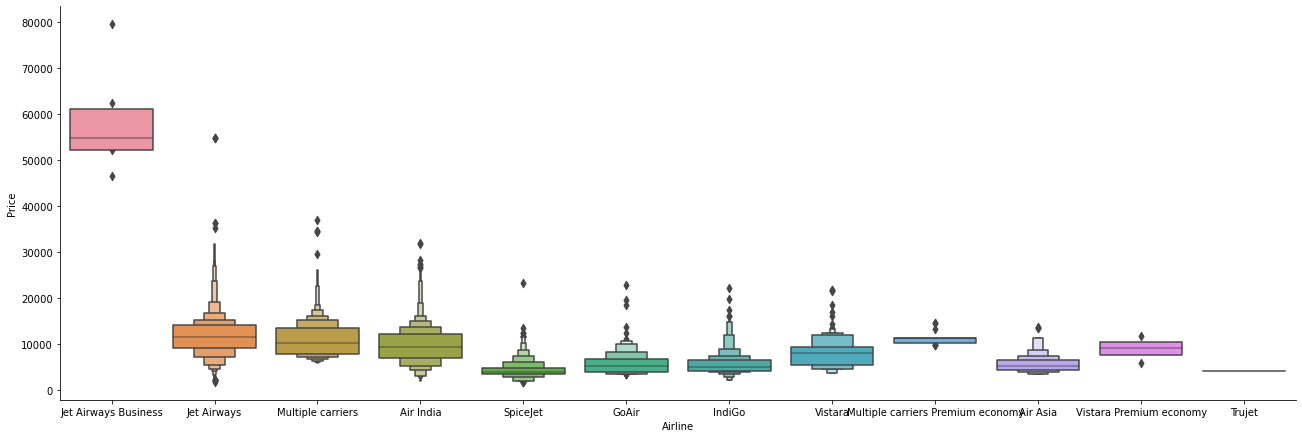

In [117]:
#Airline Vs Price
sns.catplot(y='Price',x ='Airline',data=train_data.sort_values('Price',ascending=False),kind='boxen',height =6,aspect =3)

The highest price for jet airways business,remaining all airline prices are similar

In [118]:
#As Airline is nominal Categorical data we will perform OneHotEncoding

Airline = train_data[['Airline']]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [119]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

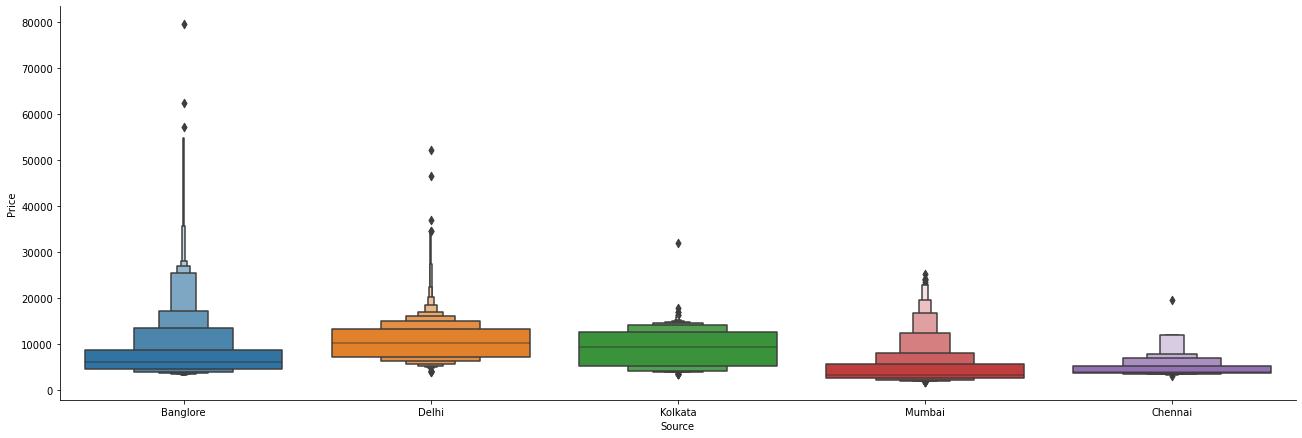

In [121]:
#Source Vs Price
sns.catplot(y='Price',x ='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen',height =6,aspect =3)


For Banglore price is high but for other city Prices are pretty simlar.

In [122]:
#As Source is nominal Categorical data we will perform OneHotEncoding

Source = train_data[['Source']]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


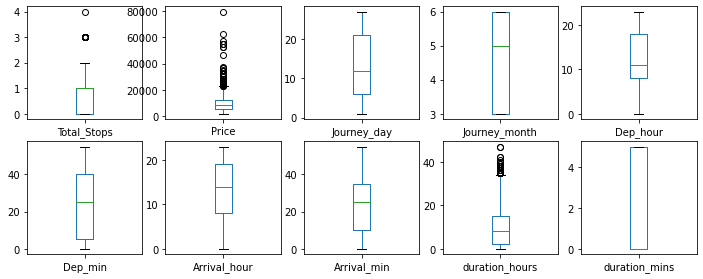

In [225]:
train_data.plot(kind='box',figsize=(12,12),layout=(5,5),sharex=False,subplots=True);

Not present Much outliers.

In [123]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [124]:
#As Destination is nominal Categorical data we will perform OneHotEncoding

Destination = train_data[['Destination']]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [126]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [127]:
#Additional_info contains almost 80% no_info
#Route and total_stops are related to each other

train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [129]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,5
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,5


In [132]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [136]:
#As this is case of ordinal category type we perform LabelEncoder
#Here values are assigned with corresponding keys

train_data.replace({'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4},inplace=True)


In [137]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,5
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,5


In [138]:
# Concantenate dataframe--> train_data + Airline + Source + Destination

data_train = pd.concat([train_data,Airline,Source,Destination],axis=1)

In [139]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


We already converted Airline,source and destination so we will drop these column.

In [140]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [141]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,5,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,5,...,0,0,0,0,0,0,0,0,0,1


In [142]:
data_train.shape

(10682, 30)

# Test set

In [199]:
test_data= pd.read_excel("C:/Users/Ankita/Downloads/flight_prediction/Test_set.xlsx")

In [200]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Preprocessing

In [201]:
print('Test_data Info')
print('-'*75)
print(test_data.info())

print()
print()

print('Null values:')
print('-'*75)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())



Test_data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values:
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time          

# EDA

In [202]:
#Date_of_Journey
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey,format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
test_data.drop(['Date_of_Journey'],axis=1,inplace= True)

#Dep_Time
#Extracting Hours
test_data['Dep_hour']= pd.to_datetime(test_data['Dep_Time']).dt.hour

#Extracting Minutes
test_data['Dep_min']= pd.to_datetime(test_data['Dep_Time']).dt.minute

#Now we can drop Dep_Time as it is of no use
test_data.drop(['Dep_Time'],axis=1, inplace= True)

#Arrival_Time
#Extracting Hours
test_data['Arrival_hour']= pd.to_datetime(test_data['Arrival_Time']).dt.hour

#Extracting Minutes
test_data['Arrival_min']= pd.to_datetime(test_data['Arrival_Time']).dt.minute

#Now we can drop Arrival_Time as it is of no use
test_data.drop(['Arrival_Time'],axis=1, inplace= True)

#Duration

duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:  #Check if duration only hour or mins
        if 'h' in duration[i]:
            duration[i]=duration[i]+ '0m'  #Adds 0 minute
        else:
            duration[i] = '0h' + duration[i].strip()      #Adds 0 hour

duration_hours =[]
duration_mins =[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep ='m')[0].strip()[-1]))

#Adding Duration Column to test set
test_data['Duration_hours']= duration_hours
test_data['Duration_mins']= duration_mins 
test_data.drop(['Duration'],axis=1,inplace=True)

                             
#As Airline,Source and Destination is nominal Categorical data we will perform OneHotEncoding

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
        
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
                             
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
                             
#Additional_info contains almost 80% no_info
#Route and total_stops are related to each other

test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

#Replacing Total_Stops
test_data.replace({'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4},inplace=True)
                             
# Concantenate dataframe--> test_data + Airline + Source + Destination

data_test = pd.concat([test_data, Airline, Source, Destination],axis=1)
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
                
print()
print()
                    
print('Shape of test data:',data_test.shape)



Shape of test data: (2671, 28)


In [203]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,5,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,5,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [204]:
data_train.shape

(10682, 30)

In [205]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [206]:
x = data_train.drop(['Price'],axis=1)

In [207]:
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,5,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,5,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,5,0,...,0,0,0,0,0,0,0,0,0,1


In [208]:
y= data_train['Price']

In [209]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

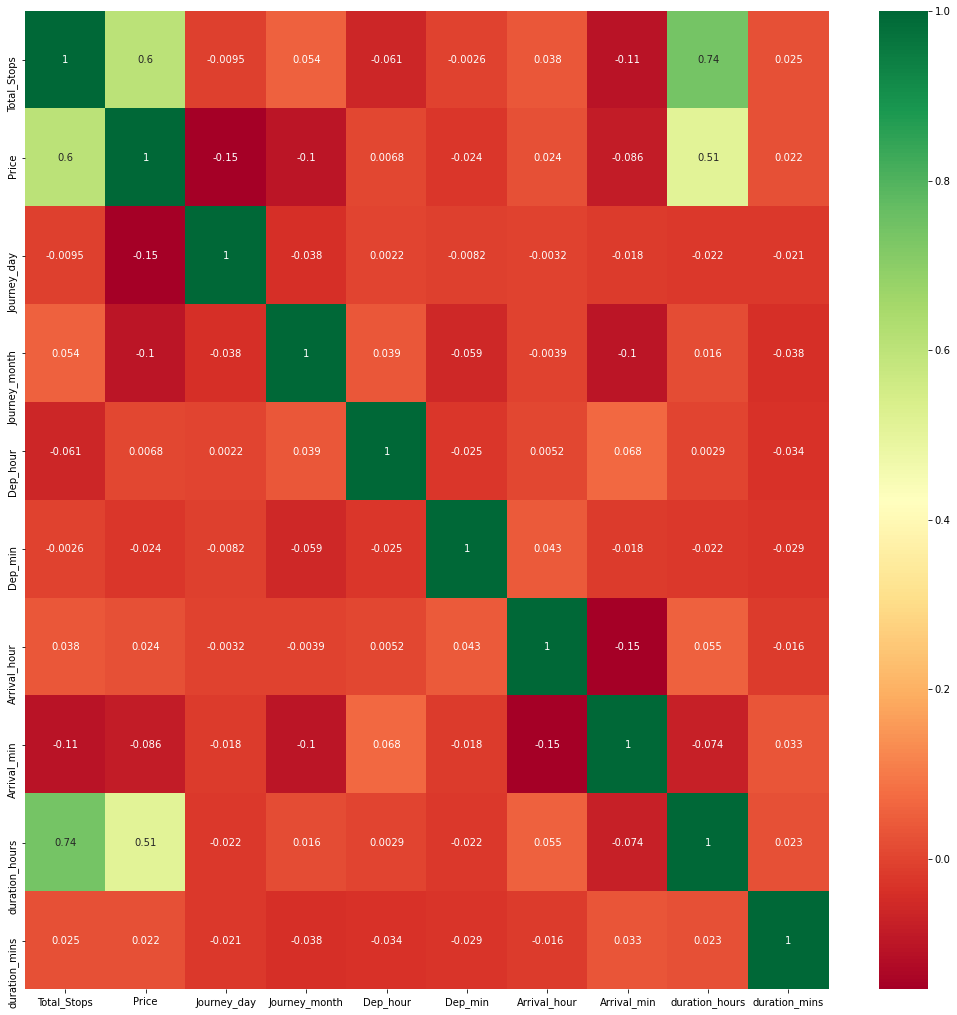

In [210]:
#Finds correlation between Independent and dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True, cmap='RdYlGn')

plt.show()

In [212]:
#Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [214]:
print(selection.feature_importances_)

[2.35544791e-01 1.43185254e-01 5.33614054e-02 2.57229621e-02
 2.35100243e-02 2.90803156e-02 2.11952832e-02 1.10944500e-01
 1.01904509e-02 1.11990095e-02 1.72960270e-03 1.79172395e-02
 1.41355103e-01 6.71716627e-02 1.89463277e-02 8.99039724e-04
 2.93195252e-03 1.02662459e-04 5.54655286e-03 1.04041868e-04
 5.59490051e-04 1.26543154e-02 3.25016180e-03 8.38428998e-03
 9.89761112e-03 1.33333108e-02 5.80552295e-03 5.03936299e-04
 2.49731796e-02]


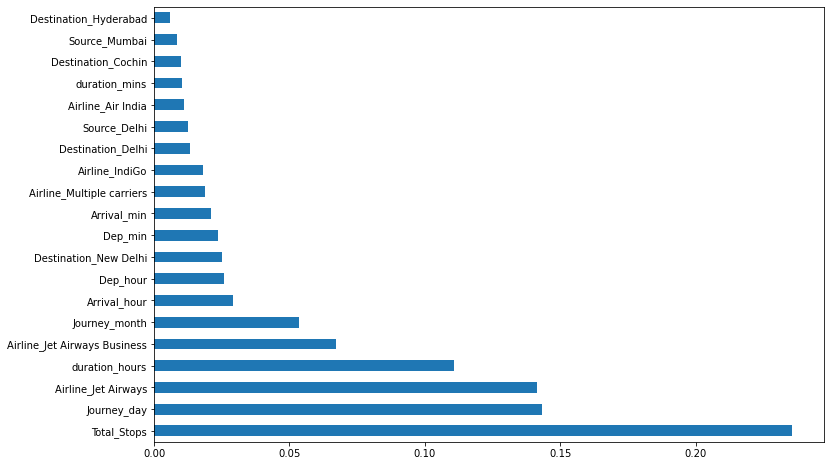

In [215]:
#plot graph of feature importances for better visualization

plt.figure(figsize =(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Total_Stops plays important role in this dataset.

# Fitting model 

1.Split dataset into train and test set.


In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [219]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [220]:
y_pred = reg_rf.predict(x_test)

In [221]:
reg_rf.score(x_train, y_train)

0.9527800495720649

In [222]:
reg_rf.score(x_test,y_test)

0.8007453346452937

In [223]:
from sklearn import metrics

print('MAE:' ,metrics.mean_absolute_error(y_test,y_pred))
print('MSE:' ,metrics.mean_squared_error(y_test,y_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1165.2778051548098
MSE: 4296340.317230184
RMSE: 2072.761519623081


In [224]:
metrics.r2_score(y_test,y_pred)

0.8007453346452937

# Linear Regression Model

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
lm= LinearRegression()
model = lm.fit(x_train,y_train)

In [228]:
lm.coef_

array([ 2.75624761e+03, -7.25148545e+01, -4.25847081e+02,  2.04203380e+01,
       -2.31746304e+00, -1.12860534e+01,  2.05281326e+00,  2.58916548e+00,
       -4.73486287e+00,  1.67489107e+03,  2.09321435e+02,  2.34992042e+02,
        4.38538284e+03,  4.77676827e+04,  3.72154110e+03,  4.07409501e+03,
       -2.40310501e+02, -2.63618789e+03,  2.08442674e+03,  3.10362446e+03,
        2.14343966e+01,  6.02130012e+01,  9.41869641e+00, -8.21050509e+02,
        6.02130012e+01, -8.50651051e+02, -8.21050509e+02,  2.14343966e+01,
        1.58063547e+03])

In [229]:
lm.intercept_

7276.2219924442525

In [230]:
pred=lm.predict(x_test)

In [231]:
lm.score(x_train,y_train)

0.6240473241316622

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [235]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [236]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

8202695.6444505295


In [237]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.6190714395292305

# Hyperparameter Tuning

1.Choose following method for hyperparameter tuning
  a)RandomizedSearchCV
  b)GridSearchCV
  
2.Assign hyperparameters in form of dictionery
3.Fit the model
4.Check best parameters and best score.

In [241]:
from sklearn.model_selection import RandomizedSearchCV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 12)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num =6)]
#Maximum number of samples requried to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples requried at each leaf node
min_samples_leaf = [1,2,5,10]

In [242]:
#Create the random grid

random_grid ={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

In [243]:
#Random search of parameters, using 5 fold cross validation,
#search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error' ,n_iter = 10,cv =5, verbose=2,random_state=42,n_jobs =1)

In [244]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [245]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [246]:
prediction = rf_random.predict(x_test)

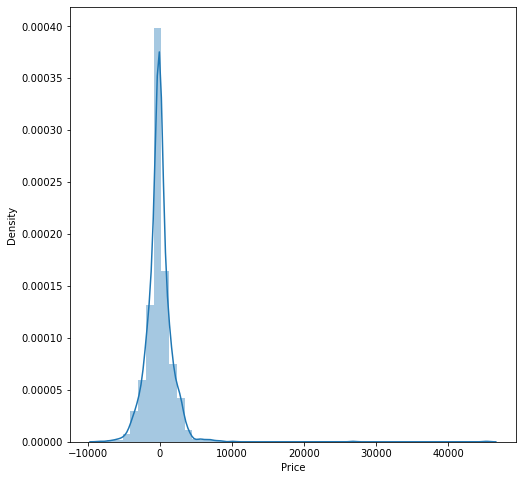

In [247]:
plt.figure(figsize =(8,8))
sns.distplot(y_test-prediction)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

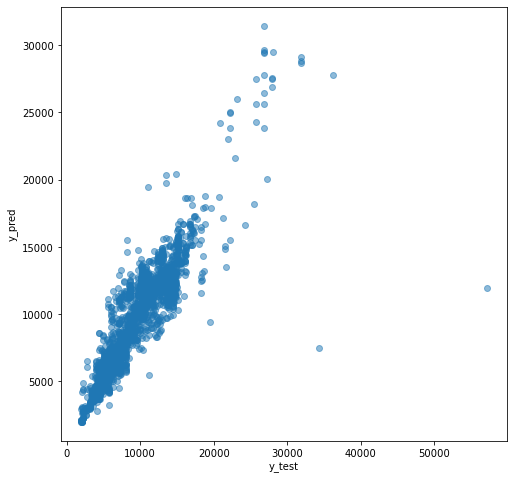

In [248]:
plt.figure(figsize =(8,8))
plt.scatter(y_test,prediction,alpha= 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show

In [250]:
print('MAE:' ,metrics.mean_absolute_error(y_test,prediction))
print('MSE:' ,metrics.mean_squared_error(y_test,prediction))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1158.0521003772255
MSE: 4012119.8401849656
RMSE: 2003.0276683523284


# Save the model to reuse it again

In [256]:
import pickle
#Open a file,where you ant to store the data
file = open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)

In [257]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [258]:
y_prediction = forest.predict(x_test)

In [259]:
metrics.r2_score(y_test,y_prediction)

0.8139268453867683